# Análise Exploratória e Pré-Processamento de Dados para Machine Learning

### Autor: 
- [Thomas Chiari Ciocchetti de Souza](https://github.com/thomaschiari)

Grande parte de um projeto de Machine Learning se trata de entender o problema, avaliar os dados e prepará-los para o modelo. Neste notebook, vamos explorar algumas técnicas de análise exploratória e pré-processamento de dados.

Para um dataset, podemos ter diversos tipos de variáveis, como numéricas, categóricas, ordinais, binárias, etc. Cada tipo de variável requer um tratamento diferente. Além disso, podemos ter dados faltantes, outliers, variáveis altamente correlacionadas, etc.

Portanto, nessa etapa, é necessário: 
- Entender o problema
- Entender os tipos de dados
- Entender os dados faltantes e como tratá-los
- Compreender a natureza das variáveis categoricas e como tratá-las
- Feature Engineering
- Análise estatística dos dados

Nos dois primeiros itens, o necessário a se fazer é se debruçar sobre os dados, conversar com quem já conhece o problema; ainda não estamos falando de código. Os itens seguintes já envolvem código, mas ainda não estamos falando de modelos de Machine Learning.

## Parte 1: Análise Exploratória de Dados

Para a análise exploratória, utilizaremos o dataset [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), disponível no Kaggle. O objetivo é prever o preço de venda de casas em Ames, Iowa, EUA, com base em diversas variáveis explicativas. Se trata de um problema de regressão, visto que estamos buscando prever um valor contínuo.

In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [18]:
import os
PATH = os.path.join('data', 'house-prices', 'train.csv')

In [19]:
dataset = pd.read_csv(PATH, encoding='utf-8')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Nesse dataset, temos 79 variáveis explicativas, que podem ser numéricas ou categóricas, e uma variável resposta, além de uma variável identificadora. A variável resposta é, obviamente, a que desejamos prever, e a variável identificadora é apenas um identificador único para cada casa. É possível que essa variável não seja útil para o modelo, mas, por enquanto, vamos mantê-la. é possível encontrar a descrição de cada variável no arquivo [`data_description.txt`](data/house-prices/data_description.txt).

Vamos iniciar com uma descrição geral do dataset, obtendo algumas informações básicas sobre as variáveis, como tipos, valores faltantes, médias, desvios e quartis. Para isso, utilizaremos a biblioteca `pandas`, que é uma das mais utilizadas para manipulação de dados em Python.

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Agora, vamos entender melhor nossa variável resposta. Vamos plotar um histograma para entender sua distribuição, junto com algumas métricas importantes para verificar sua distribuição.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
df = dataset.copy()

<Axes: xlabel='SalePrice', ylabel='Density'>

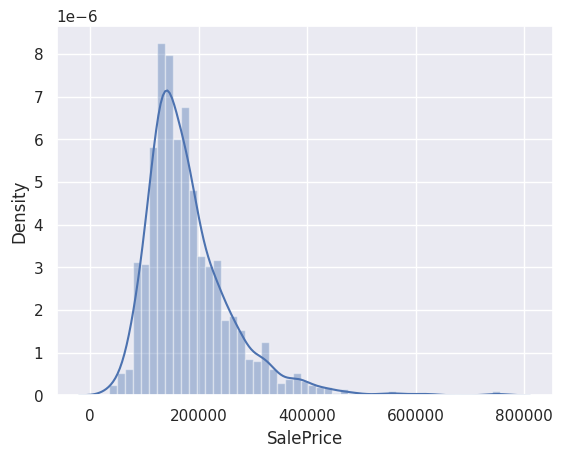

In [25]:
sns.distplot(df['SalePrice'])

In [26]:
# Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Podemos observar que a variável resposta não é normalmente distribuída, o que pode ser um problema para alguns modelos de regressão. Além disso, temos alguns outliers, que podem prejudicar o modelo. Vamos verificar a presença de outliers com um boxplot.

<Axes: >

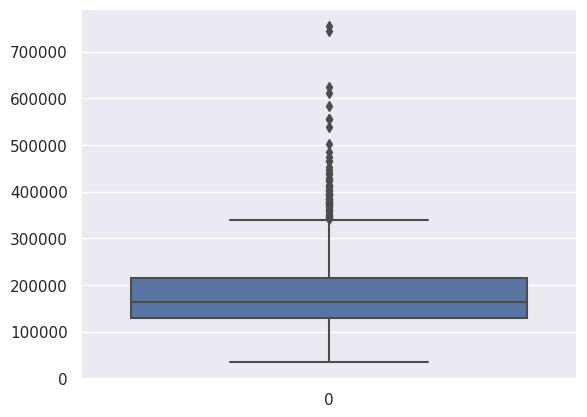

In [28]:
sns.boxplot(df['SalePrice'])

Como pode ser visualizado, existem alguns outliers na variável resposta. Vamos realizar, agora, uma log transformação da variável resposta, deixando-a mais próxima de uma distribuição normal, suavizando a presença de outliers. Em seguida, vamos avaliar essa nova variável visualmente. 

Skewness: 0.121335
Kurtosis: 0.809532


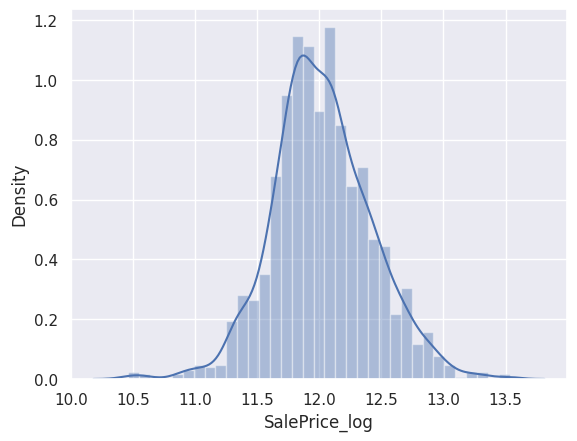

In [29]:
df['SalePrice_log'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice_log'])

# Skewness and Kurtosis
print("Skewness: %f" % df['SalePrice_log'].skew())
print("Kurtosis: %f" % df['SalePrice_log'].kurt())

<Axes: >

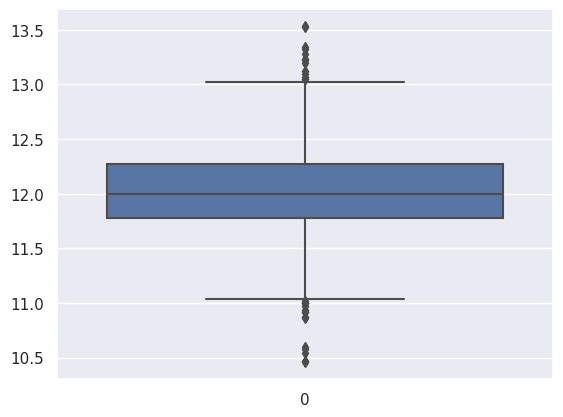

In [30]:
sns.boxplot(df['SalePrice_log'])

Como podemos observar, a distribuição da variável resposta se aproxima de uma distribuição normal, e os outliers foram suavizados. Skewness e Curtosis são duas métricas estatísticas que medem o grau de assimetria e curtose de uma distribuição, respectivamente. Uma distribuição normal possui Skewness e Curtosis iguais a 0, portanto quanto mais próximas de zero em um dataset, mais próximo de uma normal a distribuição está.

Agora, vamos verificar as variáveis numéricas e categóricas, além de identificar os valores faltantes.

In [31]:
var_numericas = df.dtypes[df.dtypes != 'object'].index
print(f'Número de variáveis numéricas: {len(var_numericas)}')
var_numericas

Número de variáveis numéricas: 39


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_log'],
      dtype='object')

In [32]:
var_cat = df.dtypes[df.dtypes == 'object'].index
print(f'Número de variáveis categóricas: {len(var_cat)}')
var_cat

Número de variáveis categóricas: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
valores_na = df.isnull().sum().sort_values(ascending=False)
porcentagem = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
df_na = pd.concat([valores_na, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
df_na.head(20)

,Total,Porcentagem
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479


Aqui, podemos ver algumas variáveis com grande quantidade de valores faltantes. Algumas, como `PoolQC`, `MiscFeature`, `Alley` e `Fence`, possuem mais de 80% dos valores faltantes, pois avaliam, de acordo com a documentação, a qualidade da piscina, a presença de recursos diversos não descritos nos demais dados, a qualidade da cerca, o tipo de via de acesso à propriedade... Portanto, em caso de falta de tais itens, é possível que o valor não tenha sido preenchido. Portanto, por enquanto, vamos preencher tais valores faltantes com a string `None`, representando a ausência de tais itens. Vamos fazer isso para todas as variáveis que se enquadram em tal situação, de acordo com a documentação.

In [36]:
# Separando as colunas que NaN tem algum significado
colunas_fill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in colunas_fill:
    df[col].fillna('None', inplace=True)

Agora realizaremos novamente a análise de faltantes. 

In [37]:
valores_na = df.isnull().sum().sort_values(ascending=False)
porcentagem = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
df_na = pd.concat([valores_na, porcentagem], axis=1, keys=['Total', 'Porcentagem'])
df_na.head()

,Total,Porcentagem
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


Os demais valores faltantes não possuem algum significado, e existem diversas técnicas para preenchê-los. Vamos utilizar, aqui, a técnica de preenchimento por média e por moda.

In [38]:
df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.mode(), inplace=True)
df.MasVnrArea.fillna(df.MasVnrArea.mean(), inplace=True)

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,12.429216
